In [35]:
from sklearn.decomposition import PCA
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


import sys
sys.path.append('..')

from utils.datasets import TorchDataset as TD
import seaborn as sns

In [36]:
mode = 'test'
test_block = 'flat'
ncauses =19
nlatents = 64

In [37]:
import numpy as np

data_loader = DataLoader(TD(f'/data/Data/PD/activations_{test_block}_{mode}'), batch_size=128, shuffle=False)
data = np.array([v.numpy() for b in data_loader for v in b], dtype=object)

In [38]:
activations = data[:, ncauses:]
pca = PCA(n_components=nlatents)
pca_result = pca.fit_transform(activations)

In [39]:
def joint_plot(x, y, col, name):
    fig = plt.figure(figsize=(4, 4))
    gs = fig.add_gridspec(4, 4, wspace=0, hspace=0)

    # Create the scatter plot and marginal axes
    ax_scatter = fig.add_subplot(gs[1:, :-1])
    ax_histx = fig.add_subplot(gs[0, :-1], sharex=ax_scatter)
    ax_histy = fig.add_subplot(gs[1:, -1], sharey=ax_scatter)

    palette = sns.color_palette('deep', 15)

    sns.scatterplot(x=x, y=y, hue=col, palette='deep', alpha=0.6,
                    ax=ax_scatter, legend=False)
    cat = np.unique(col)
    for category, color in zip(cat, palette[:len(cat)]):
        mask = col == category
        sns.kdeplot(x=x[mask], ax=ax_histx, color=color, fill=True, alpha=0.5, label=category)
        sns.kdeplot(y=y[mask], ax=ax_histy, color=color, fill=True, alpha=0.5, label=category)

    ax_histx.set_ylabel('')
    ax_histx.set_title(name)
    ax_histy.set_xlabel('')

    ax_scatter.set_xlabel(f'PCA Mode 1')
    ax_scatter.set_ylabel(f'PCA Mode 2')

    ax_scatter.set_xticks([])
    ax_scatter.set_yticks([])

    ax_histx.grid(False)
    ax_histy.grid(False)

    ax_histx.set_xticks([])
    ax_histx.set_yticks([])

    ax_histy.set_xticks([])
    ax_histy.set_yticks([])

    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

    plt.show()

    return fig

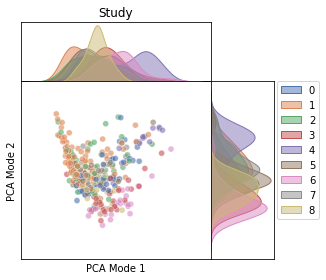

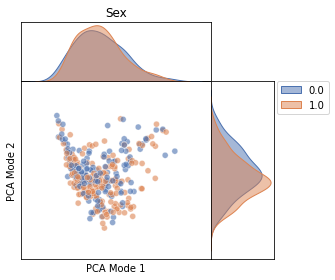

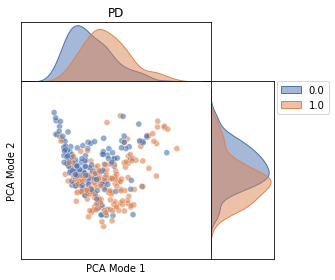

In [40]:
joint_plot(pca_result[:, 0], pca_result[:, 1], np.argmax(data[:, :9],axis=1), 'Study').savefig(f'/data/Papers/MICCAI-biases/pca/{mode}_{test_block}_pca_Study.pdf')
joint_plot(pca_result[:, 0], pca_result[:, 1], data[:, 9], 'Sex').savefig(f'/data/Papers/MICCAI-biases/pca/{mode}_{test_block}_pca_Sex.pdf')
joint_plot(pca_result[:, 0], pca_result[:, 1], data[:, 18], 'PD').savefig(f'/data/Papers/MICCAI-biases/pca/{mode}_{test_block}_pca_PD.pdf')
